In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io.arff import loadarff

from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
data_ex = np.load('./data_processed/chunk1.npy')

In [3]:
df = pd.DataFrame(data_ex)
df 

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59,class
0,-546.363194,116.986956,-4.861569,51.700080,15.538524,6.019769,37.343437,18.527990,5.205468,15.114531,...,1.648100,0.822641,-1.030715,0.558009,0.137724,-0.978016,-0.147688,0.907830,-1.749435,b'bus'
1,-562.017570,128.086304,1.552109,56.674744,13.191814,46.531231,-2.868772,10.101376,9.949976,4.952168,...,-0.963068,-0.579091,-0.028036,-0.470492,-0.176212,-0.179167,-0.697224,0.134356,-0.502883,b'park'
2,-768.048558,90.002034,28.859072,48.151764,33.930091,34.649997,8.017895,14.876892,13.486202,13.566324,...,1.140748,0.320619,0.226141,0.448586,0.703261,0.170229,0.553997,0.205054,0.235601,b'library'
3,-536.729254,83.950984,-14.513036,72.052425,-7.748932,36.995510,10.646910,24.491250,18.679747,13.051731,...,-0.827044,-0.007084,-0.236357,0.034784,0.025573,0.257708,0.144899,-0.363672,-0.432049,b'beach'
4,-443.741002,113.668029,6.103396,82.082974,26.549264,42.370981,0.746439,16.298728,6.385143,4.087002,...,-0.651513,-0.621321,-0.197123,-0.064164,0.692588,-0.386767,-0.201101,-0.731063,-0.040211,b'beach'
5,-468.450291,115.821716,2.043111,56.358352,-1.442755,34.461003,5.048660,7.414895,16.730959,-0.538833,...,0.539715,0.501159,-0.684723,-0.097873,0.526374,-0.177490,0.088637,-0.254302,-0.684588,b'bus'
6,-707.201215,128.927180,-2.365219,25.880709,25.907057,22.191652,13.830554,19.210379,12.877421,5.947068,...,-0.408910,-0.467706,0.005861,0.471435,0.152756,-0.182363,-0.734640,-0.679044,-1.041173,b'home'
7,-802.639168,81.669201,24.638036,22.457644,10.252188,18.402375,14.254640,7.424408,13.344056,1.284894,...,-0.477893,-0.224564,-0.069185,0.006891,-0.334939,0.217100,0.534579,0.056415,-0.158931,b'home'
8,-598.451064,94.106364,-18.453055,52.278969,-33.771214,54.581154,11.496161,-10.596063,26.305748,2.282023,...,-0.125229,-0.829289,-0.474966,-0.032922,0.292558,0.226530,0.764035,0.880042,0.493589,b'residential_area'
9,-515.373734,151.919879,-65.159910,37.123366,9.475245,32.048897,8.191691,16.825710,18.698969,-7.216457,...,0.814644,-0.462986,-0.119109,0.082351,0.376746,0.119994,0.156064,-0.188792,-0.262887,b'city_center'


In [4]:
df['class'].dtypes

dtype('O')

### Decoding class to string

In [5]:
df['class'] = df['class'].str.decode("utf-8")

### Check the classes

In [6]:
df['class'].unique()

array(['bus', 'park', 'library', 'beach', 'home', 'residential_area',
       'city_center', 'metro_station', 'cafe/restaurant', 'train',
       'grocery_store', 'car', 'forest_path', 'tram', 'office'], dtype=object)

In [7]:
df.groupby("class").size()

class
beach               6731
bus                 6642
cafe/restaurant     6745
car                 6664
city_center         6762
forest_path         6598
grocery_store       6631
home                6523
library             6708
metro_station       6700
office              6559
park                6748
residential_area    6649
train               6641
tram                6699
dtype: int64

### General desctiption of data

In [8]:
df_des = df.describe()
df_des

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_50,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-563.045776,128.289140,0.929733,40.261893,7.427249,27.314829,6.706253,11.059276,10.164697,3.620941,...,0.002287,-0.003849,0.003539,-0.003232,-0.002008,-0.005086,0.005015,-0.002105,0.000364,-0.001059
std,107.707262,31.127973,26.631801,14.624264,15.176482,10.097731,11.522480,8.328018,8.352303,7.600074,...,0.636644,0.626545,0.616789,0.609815,0.603632,0.600334,0.593762,0.588322,0.586641,0.581049
min,-850.993757,-108.262795,-109.612891,-29.543754,-66.380459,-32.036983,-50.478691,-36.913964,-36.574435,-40.963593,...,-6.724944,-3.710221,-6.300818,-3.802532,-3.852229,-3.131844,-3.632522,-3.773857,-5.645920,-3.904433
25%,-635.823246,110.723124,-17.378966,31.523508,-2.940075,20.641538,-1.016564,5.592116,4.680422,-1.348323,...,-0.413491,-0.413185,-0.402363,-0.406569,-0.400859,-0.403072,-0.384709,-0.392519,-0.387651,-0.384142
50%,-551.302645,131.506493,-1.076070,40.948712,6.142018,27.236360,6.604398,11.026781,10.208249,3.707604,...,0.001262,-0.004255,0.001113,-0.002793,-0.001154,-0.007133,0.003906,0.000569,0.001321,0.001640
75%,-487.536404,148.574315,18.157068,49.964574,16.965401,33.891498,14.391539,16.608224,15.664185,8.643199,...,0.417641,0.407835,0.410938,0.398118,0.397666,0.392742,0.397194,0.389669,0.388947,0.383782
max,-101.249533,269.511566,103.502604,123.160912,84.639720,82.063256,66.850272,71.031996,52.689333,44.446383,...,6.915189,3.481261,4.050057,3.462754,2.919022,4.283516,3.777060,3.282056,3.616336,3.200220


In [49]:
df_des.loc['mean',:].values

array([ -5.63045776e+02,   1.28289140e+02,   9.29732702e-01,
         4.02618930e+01,   7.42724880e+00,   2.73148288e+01,
         6.70625253e+00,   1.10592758e+01,   1.01646967e+01,
         3.62094054e+00,   4.63353388e+00,   7.75568924e+00,
         3.62541789e+00,   4.55572161e+00,   2.56853577e+00,
         5.07386744e+00,  -1.90074347e-01,   4.46542224e+00,
         3.17551184e-01,   3.42506795e+00,   5.91027521e-03,
        -1.56802940e-02,   8.13682004e-03,  -8.87659291e-03,
         1.90127494e-03,  -1.14871193e-03,   4.42353609e-03,
         3.04866521e-03,  -3.74117981e-03,   2.23601135e-03,
        -3.90197614e-04,   2.57205463e-03,   3.43371291e-03,
         3.97730791e-03,  -4.36806210e-05,  -2.43197093e-04,
        -1.62711168e-03,  -1.78331334e-03,  -5.15235556e-03,
         2.68945618e-03,   9.21739187e-03,  -2.89649889e-02,
         1.60664809e-02,  -1.22147861e-02,   8.04562421e-03,
        -7.86780941e-03,   1.84549929e-03,  -1.43772453e-03,
         2.43596227e-03,

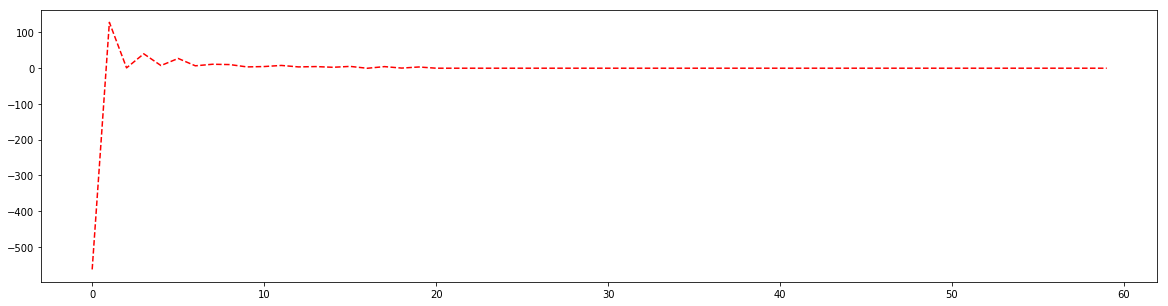

In [52]:
plt.figure(figsize=(20,5))
plt.plot(df_des.loc['mean',:].values,'r--')
plt.show()

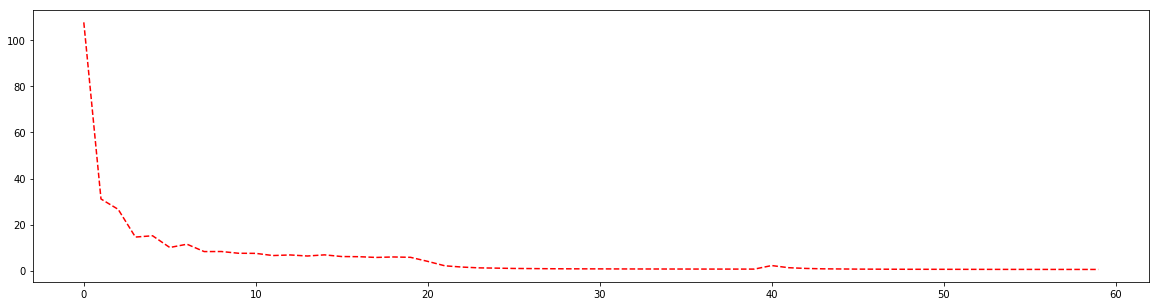

In [71]:
plt.figure(figsize=(20,5))
plt.plot(df_des.loc['std',:].values,'r--')
plt.show()

## Data Visualization

### Histogram

In [11]:
df.loc[:,['mfcc_1','mfcc_2']]

,mfcc_1,mfcc_2
0,116.986956,-4.861569
1,128.086304,1.552109
2,90.002034,28.859072
3,83.950984,-14.513036
4,113.668029,6.103396
5,115.821716,2.043111
6,128.927180,-2.365219
7,81.669201,24.638036
8,94.106364,-18.453055
9,151.919879,-65.159910


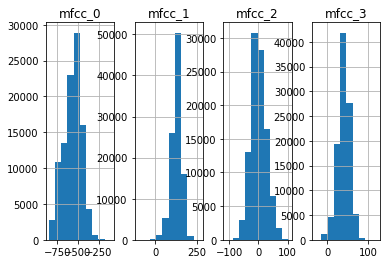

In [12]:
plt.figure()
df.loc[:,'mfcc_0':'mfcc_3'].hist(layout=(1,4))
plt.show()

plt.figure(figsize=(5,5))
plt.hist(df.loc[:,'mfcc_0':'mfcc_3'])
plt.show()

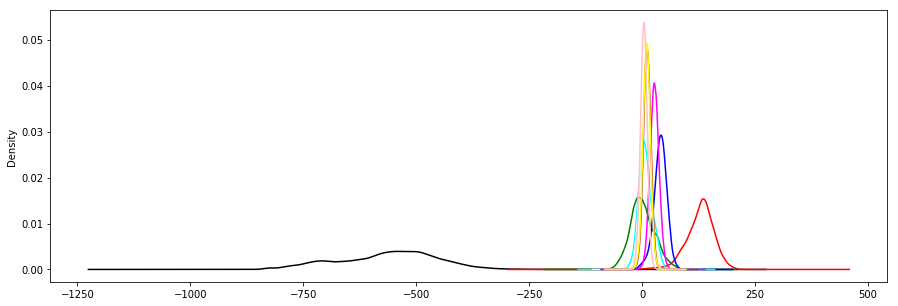

In [64]:
plt.figure(figsize=(15,5))
df['mfcc_0'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_1'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_2'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_3'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_4'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_5'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_6'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_7'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_8'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_9'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

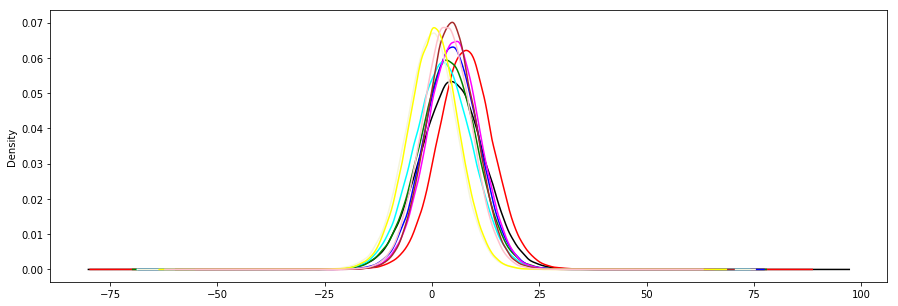

In [65]:
plt.figure(figsize=(15,5))
df['mfcc_10'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_11'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_12'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_13'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_14'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_15'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_16'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_17'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_18'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_19'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

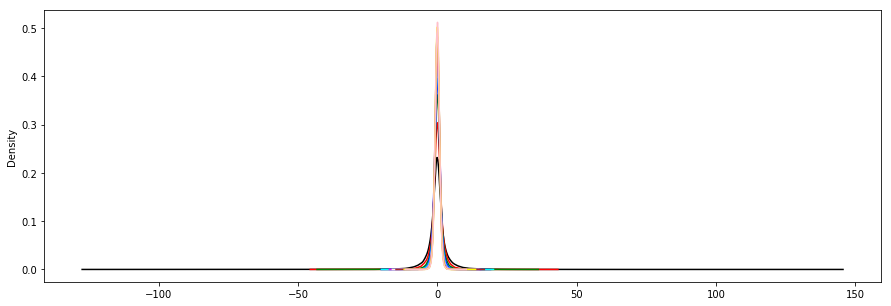

In [66]:
plt.figure(figsize=(15,5))
df['mfcc_20'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_21'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_22'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_23'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_24'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_25'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_26'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_27'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_28'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_29'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

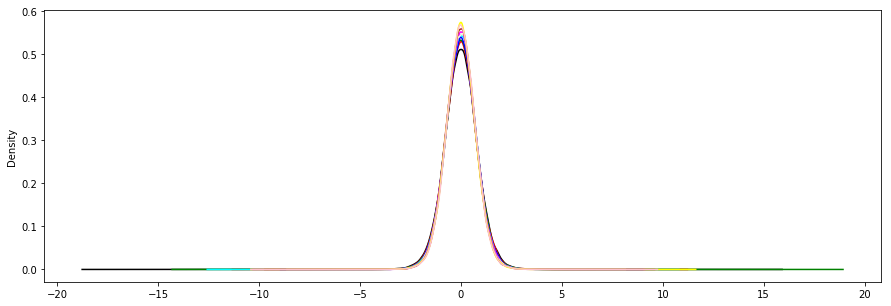

In [67]:
plt.figure(figsize=(15,5))
df['mfcc_30'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_31'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_32'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_33'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_34'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_35'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_36'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_37'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_38'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_39'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

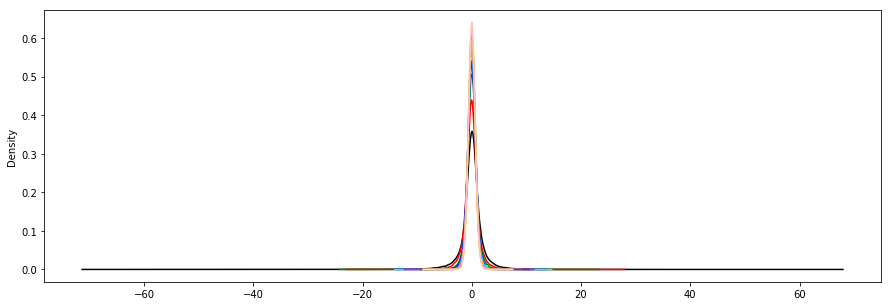

In [68]:
plt.figure(figsize=(15,5))
df['mfcc_40'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_41'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_42'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_43'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_44'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_45'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_46'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_47'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_48'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_49'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

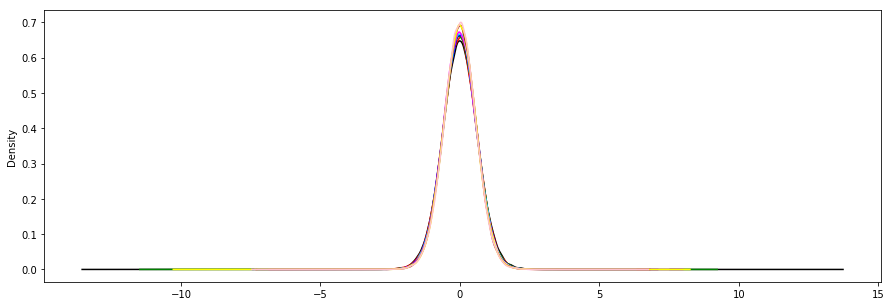

In [69]:
plt.figure(figsize=(15,5))
df['mfcc_50'].plot(kind='density',color='black', subplots=True, sharex=False)
df['mfcc_51'].plot(kind='density',color='red', subplots=True, sharex=False)
df['mfcc_52'].plot(kind='density',color='green', subplots=True, sharex=False)
df['mfcc_53'].plot(kind='density',color='blue', subplots=True, sharex=False)
df['mfcc_54'].plot(kind='density',color='cyan', subplots=True, sharex=False)
df['mfcc_55'].plot(kind='density',color='magenta', subplots=True, sharex=False)
df['mfcc_56'].plot(kind='density',color='beige', subplots=True, sharex=False)
df['mfcc_57'].plot(kind='density',color='brown', subplots=True, sharex=False)
df['mfcc_58'].plot(kind='density',color='yellow', subplots=True, sharex=False)
df['mfcc_59'].plot(kind='density',color='pink', subplots=True, sharex=False)
plt.show()

### Box and wisker plots

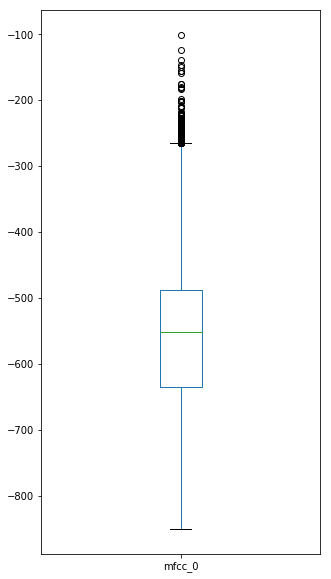

In [16]:
plt.figure(figsize=(5,10))
df['mfcc_0'].plot(kind='box', subplots=True, sharex=True, sharey=False)
plt.show()

### Feature correlation

In [17]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [70]:
# over 0.5
to_drop

['mfcc_4']

In [18]:
corr_matrix

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_50,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59
mfcc_0,1.000000,0.168701,0.292556,0.170819,0.194494,0.040401,0.096209,0.045169,0.036187,0.108657,...,0.000427,0.004322,0.000019,0.000547,0.006781,0.002021,0.010953,0.000037,0.008362,0.001417
mfcc_1,0.168701,1.000000,0.170650,0.122448,0.275679,0.083585,0.273506,0.023205,0.163379,0.007880,...,0.005388,0.009396,0.005077,0.006699,0.006896,0.013827,0.004703,0.011491,0.004090,0.022849
mfcc_2,0.292556,0.170650,1.000000,0.061296,0.616502,0.074734,0.407999,0.102988,0.162154,0.237339,...,0.004367,0.002860,0.005830,0.000711,0.004166,0.008219,0.001682,0.005306,0.002436,0.000331
mfcc_3,0.170819,0.122448,0.061296,1.000000,0.160007,0.156242,0.053672,0.047584,0.122401,0.033433,...,0.006434,0.005374,0.003160,0.000808,0.007793,0.002396,0.001673,0.000358,0.000217,0.002479
mfcc_4,0.194494,0.275679,0.616502,0.160007,1.000000,0.092806,0.447401,0.203171,0.293431,0.172105,...,0.008289,0.006947,0.005429,0.001536,0.003641,0.005292,0.001292,0.000623,0.006874,0.003827
mfcc_5,0.040401,0.083585,0.074734,0.156242,0.092806,1.000000,0.125994,0.283132,0.123530,0.076660,...,0.006164,0.011542,0.001350,0.005364,0.007330,0.002625,0.003524,0.001021,0.000889,0.002751
mfcc_6,0.096209,0.273506,0.407999,0.053672,0.447401,0.125994,1.000000,0.204787,0.331920,0.259909,...,0.005091,0.009589,0.000275,0.003187,0.001668,0.004305,0.001703,0.000746,0.001561,0.003898
mfcc_7,0.045169,0.023205,0.102988,0.047584,0.203171,0.283132,0.204787,1.000000,0.346503,0.011180,...,0.003149,0.018941,0.000421,0.002963,0.005838,0.002737,0.009595,0.000063,0.003280,0.003525
mfcc_8,0.036187,0.163379,0.162154,0.122401,0.293431,0.123530,0.331920,0.346503,1.000000,0.329413,...,0.005606,0.004005,0.011987,0.002951,0.000650,0.001407,0.001419,0.003183,0.000603,0.004650
mfcc_9,0.108657,0.007880,0.237339,0.033433,0.172105,0.076660,0.259909,0.011180,0.329413,1.000000,...,0.111440,0.001626,0.005405,0.015671,0.001264,0.007702,0.003400,0.002010,0.005292,0.001933


### Plotting heatmap

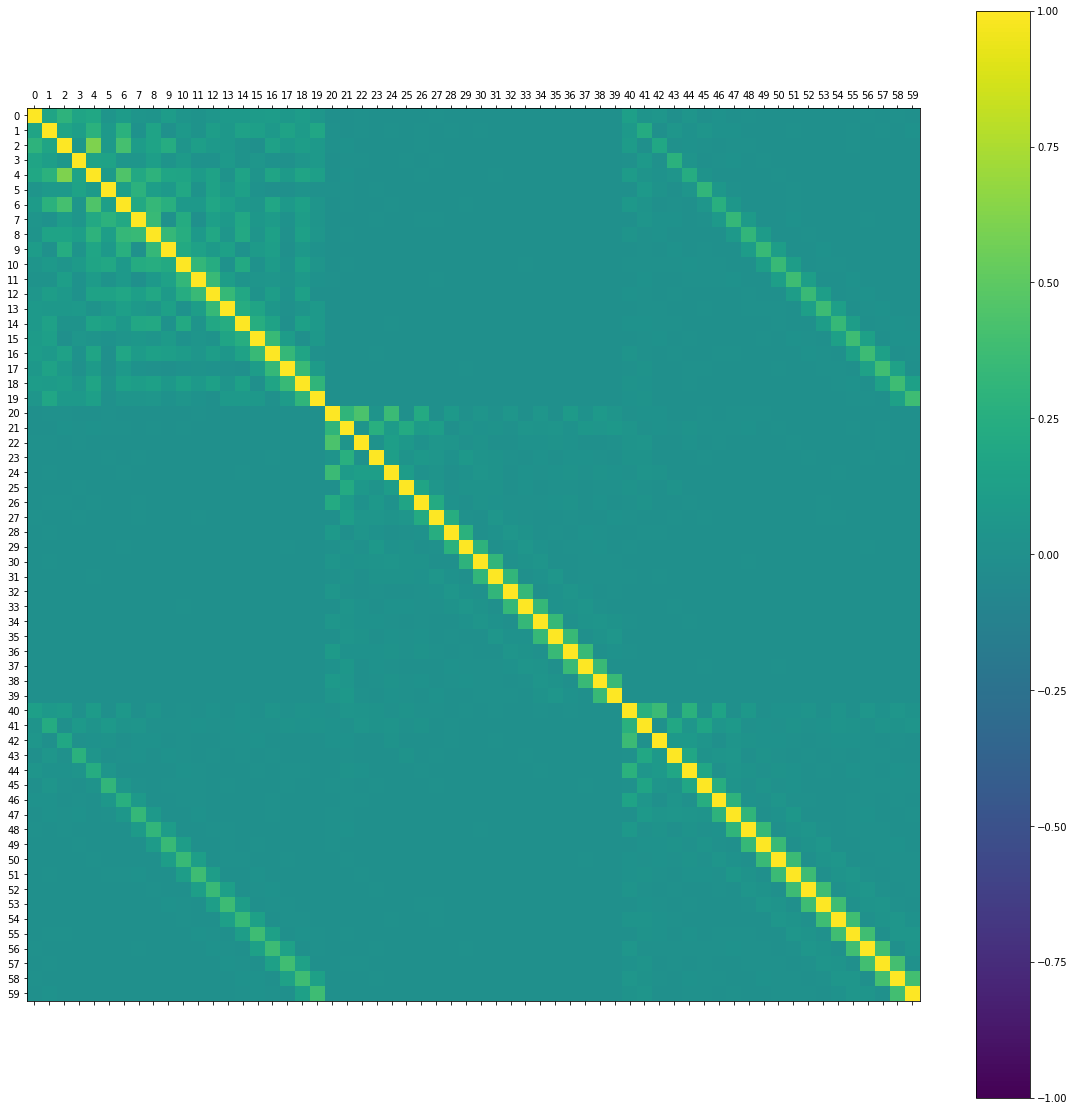

In [19]:
# plot correlation matrix
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,60,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
plt.show()

In [20]:
len(df.loc[df['class'].isin(['forest_path'])])

6598

### Feature selection

In [21]:
X = df.drop(['class'], axis=1).values
y = df['class'].values
X.shape

(100000, 60)

In [22]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(100000, 13)

In [23]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [24]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.072250)
2. feature 2 (0.062222)
3. feature 1 (0.046263)
4. feature 4 (0.042523)
5. feature 3 (0.040490)
6. feature 6 (0.033102)
7. feature 8 (0.025128)
8. feature 5 (0.024720)
9. feature 10 (0.021587)
10. feature 12 (0.019555)
11. feature 7 (0.018912)
12. feature 9 (0.017679)
13. feature 14 (0.017439)
14. feature 11 (0.015256)
15. feature 13 (0.014901)
16. feature 16 (0.014158)
17. feature 20 (0.014135)
18. feature 18 (0.014025)
19. feature 19 (0.013987)
20. feature 40 (0.013970)
21. feature 15 (0.013705)
22. feature 17 (0.013367)
23. feature 21 (0.013108)
24. feature 41 (0.012843)
25. feature 22 (0.012540)
26. feature 42 (0.012509)
27. feature 24 (0.012048)
28. feature 43 (0.011966)
29. feature 23 (0.011923)
30. feature 44 (0.011683)
31. feature 46 (0.011451)
32. feature 28 (0.011421)
33. feature 45 (0.011419)
34. feature 25 (0.011406)
35. feature 26 (0.011391)
36. feature 27 (0.011325)
37. feature 50 (0.011315)
38. feature 29 (0.011294)
39. feature 31

### Plotting feature importance

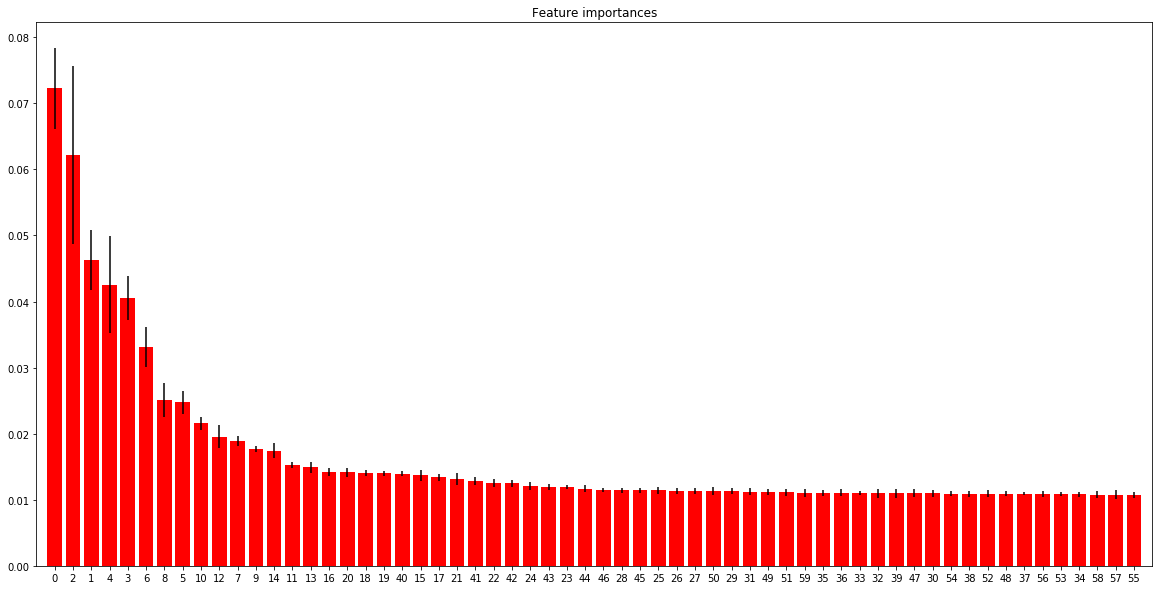

In [25]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Outlier Detection

#### Isolation Forest Algorithm

In [26]:

X = df.drop(['class'], axis=1)
dfs = np.split(X, [math.floor(len(X)*0.7)], axis=0)
X_train = dfs[0].values
X_test = dfs[1].values

In [27]:
rng = np.random.RandomState(42)
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Number of outliers

In [28]:
len(X_test[np.where(np.array(y_pred_test)<0)])

3018

In [30]:
from sklearn.manifold import TSNE
X = df.drop(['class'], axis=1).values
X_embedded = TSNE(n_components=2).fit_transform(X[0:1000,:])

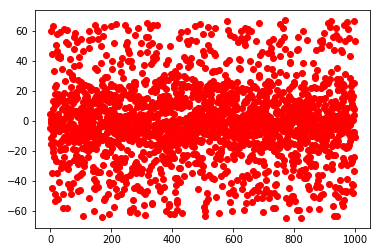

In [31]:
plt.plot(X_embedded, 'ro')
plt.show()